In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
data.shape

(5110, 12)

In [5]:
data=data.dropna()

In [6]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
data.shape

(4909, 12)

#### categorical and numerical values

Hypertension heart disease and stroke are also categorical data but they have been given codes

In [8]:
df=data.copy()

In [9]:
categorical=df[['gender','ever_married','work_type','Residence_type','smoking_status']]


In [10]:

from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
for cate in categorical:
    df[cate]=number.fit_transform(df[cate].astype('str'))
    



In [11]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [12]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [13]:
#### Independent and dependent variables
X=df.iloc[:,1:-1]
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1


In [14]:
y=df.iloc[:,-1]
y.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

### Data visualization

Text(0.5, 1.0, 'Gender vs Stroke on smoking status')

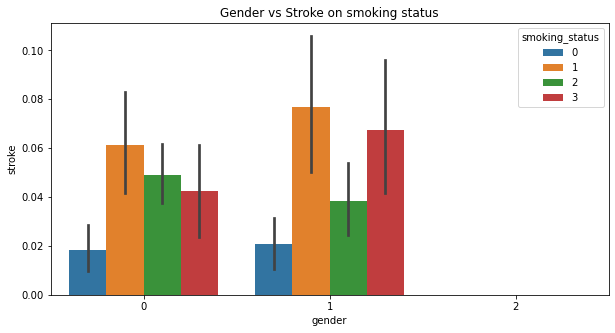

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(df.gender,df.stroke,df.smoking_status)
plt.title('Gender vs Stroke on smoking status')

In [16]:
df.corr()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.007065,0.008984,0.001147,0.004016,0.016841,-0.022644,0.004978,0.006409,0.003084,0.018482,0.004839
gender,0.007065,1.000000,-0.030738,0.021578,0.082712,-0.037237,0.058560,-0.005014,0.053664,-0.026678,-0.060004,0.006757
age,0.008984,-0.030738,1.000000,0.274425,0.257123,0.680782,-0.366987,0.010948,0.235838,0.333398,0.275515,0.232331
hypertension,0.001147,0.021578,0.274425,1.000000,0.115991,0.162406,-0.052750,-0.001074,0.180543,0.167811,0.110808,0.142515
heart_disease,0.004016,0.082712,0.257123,0.115991,1.000000,0.111245,-0.030373,-0.002362,0.154525,0.041357,0.055236,0.137938
ever_married,0.016841,-0.037237,0.680782,0.162406,0.111245,1.000000,-0.357946,0.004989,0.151377,0.341695,0.264642,0.105089
work_type,-0.022644,0.058560,-0.366987,-0.052750,-0.030373,-0.357946,1.000000,-0.005422,-0.050581,-0.304876,-0.310911,-0.033756
Residence_type,0.004978,-0.005014,0.010948,-0.001074,-0.002362,0.004989,-0.005422,1.000000,-0.007617,-0.000122,0.013810,0.006031
avg_glucose_level,0.006409,0.053664,0.235838,0.180543,0.154525,0.151377,-0.050581,-0.007617,1.000000,0.175502,0.066335,0.138936
bmi,0.003084,-0.026678,0.333398,0.167811,0.041357,0.341695,-0.304876,-0.000122,0.175502,1.000000,0.224473,0.042374


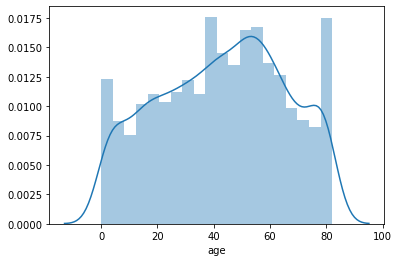

In [17]:
sns.distplot(df.age)

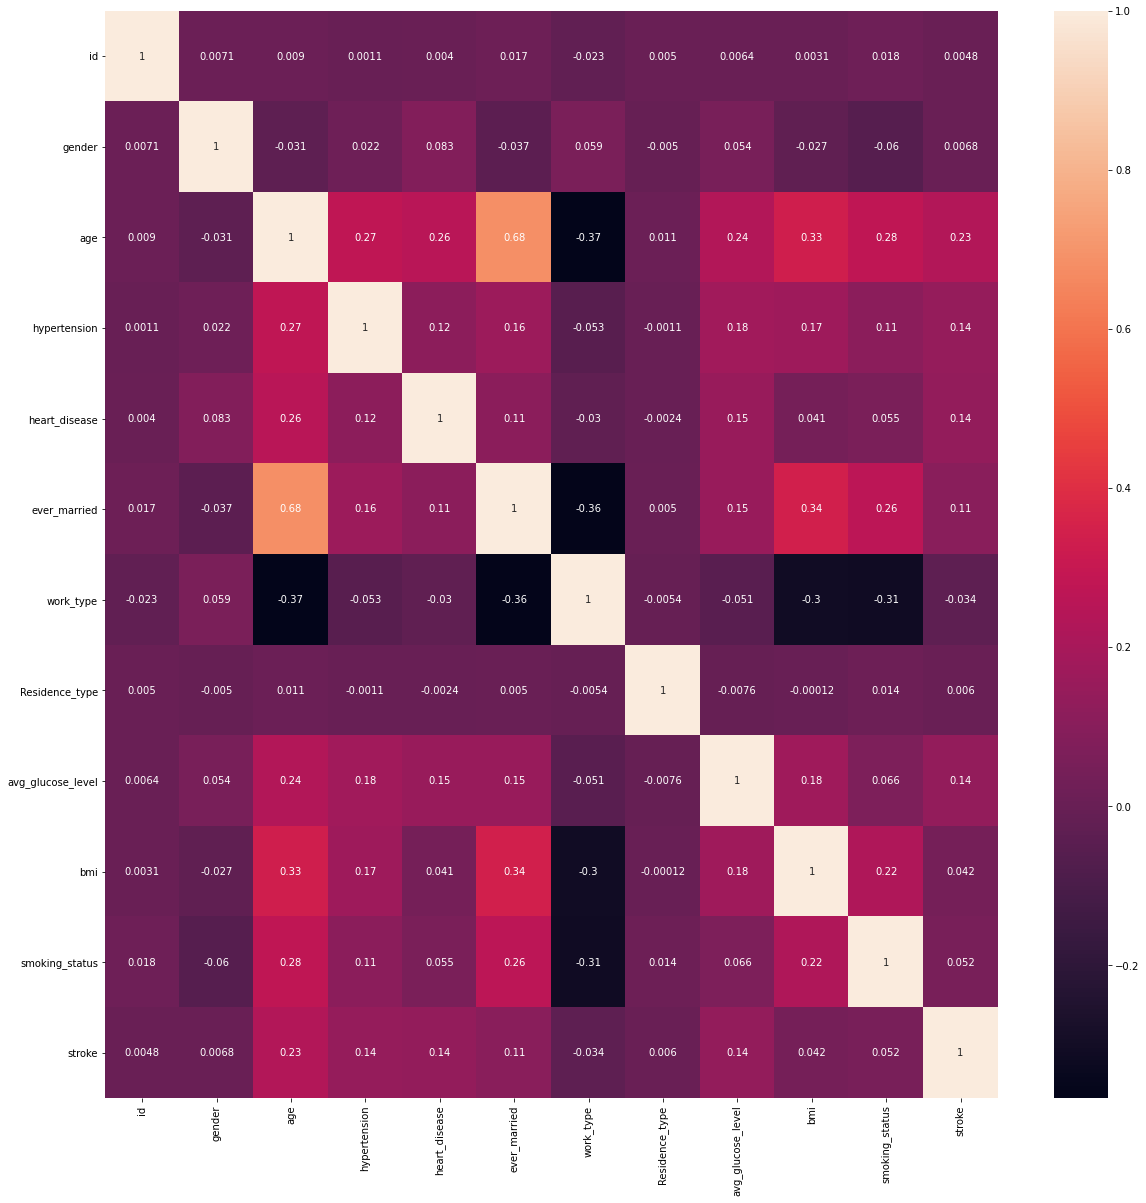

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)


#### Checking for outliers
- Here since this problem is for stroke classification we cannot ignore the outliers since they can be defining factors for example bmi and glucose level

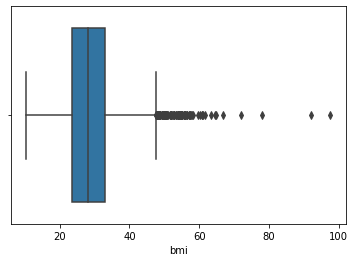

In [19]:
sns.boxplot(df.bmi)

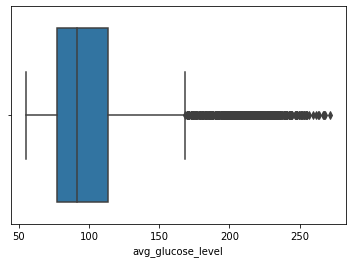

In [20]:
sns.boxplot(df.avg_glucose_level)

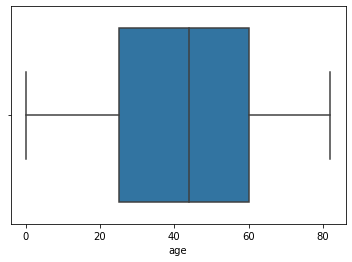

In [21]:
sns.boxplot(df.age)

In [22]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### Plotting Pie graph to understand the distribution of categories within variables

Text(0.5, 1.0, 'Residence Type percentage')

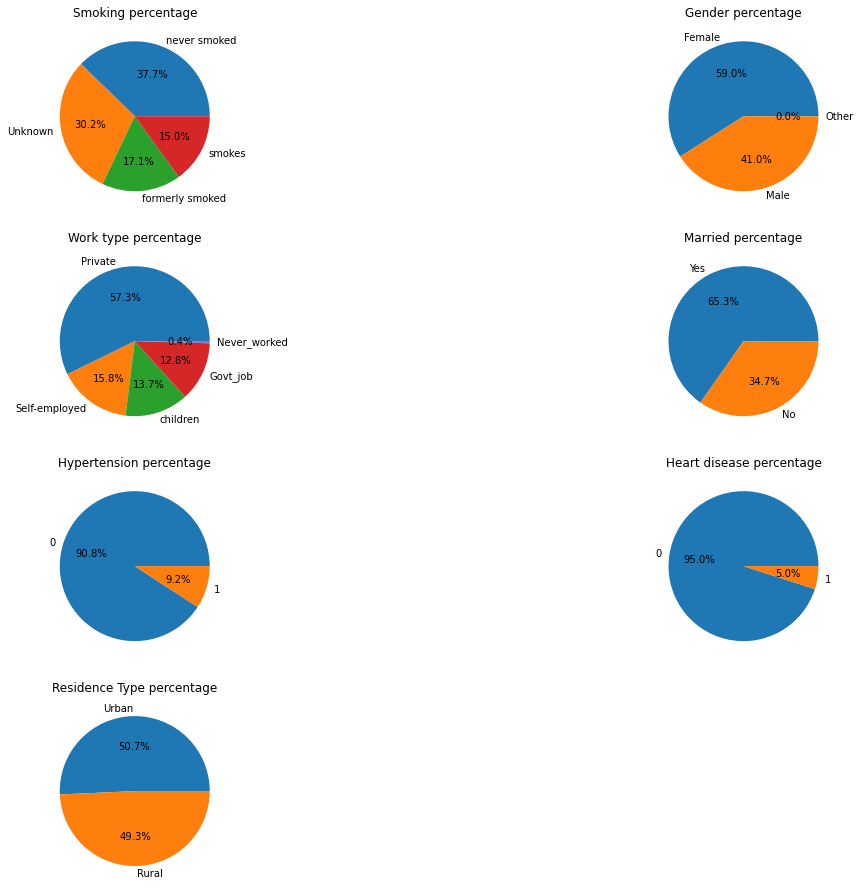

In [23]:
plt.figure(figsize=(20,20))
plt.subplot(5,2,1)
data.smoking_status.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel(' ')
plt.title('Smoking percentage')
plt.subplot(5,2,2)
data.gender.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel(' ')
plt.title('Gender percentage')
plt.subplot(5,2,3)
data.work_type.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel(' ')
plt.title('Work type percentage')
plt.subplot(5,2,4)
data.ever_married.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel(' ')
plt.title('Married percentage')
plt.subplot(5,2,5)
data.hypertension.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel(' ')
plt.title('Hypertension percentage')
plt.subplot(5,2,6)
data.heart_disease.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel(' ')
plt.title('Heart disease percentage')
plt.subplot(5,2,7)
data.Residence_type.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel(' ')
plt.title('Residence Type percentage')


### Distribution of variables

Text(0.5, 1.0, 'Age')

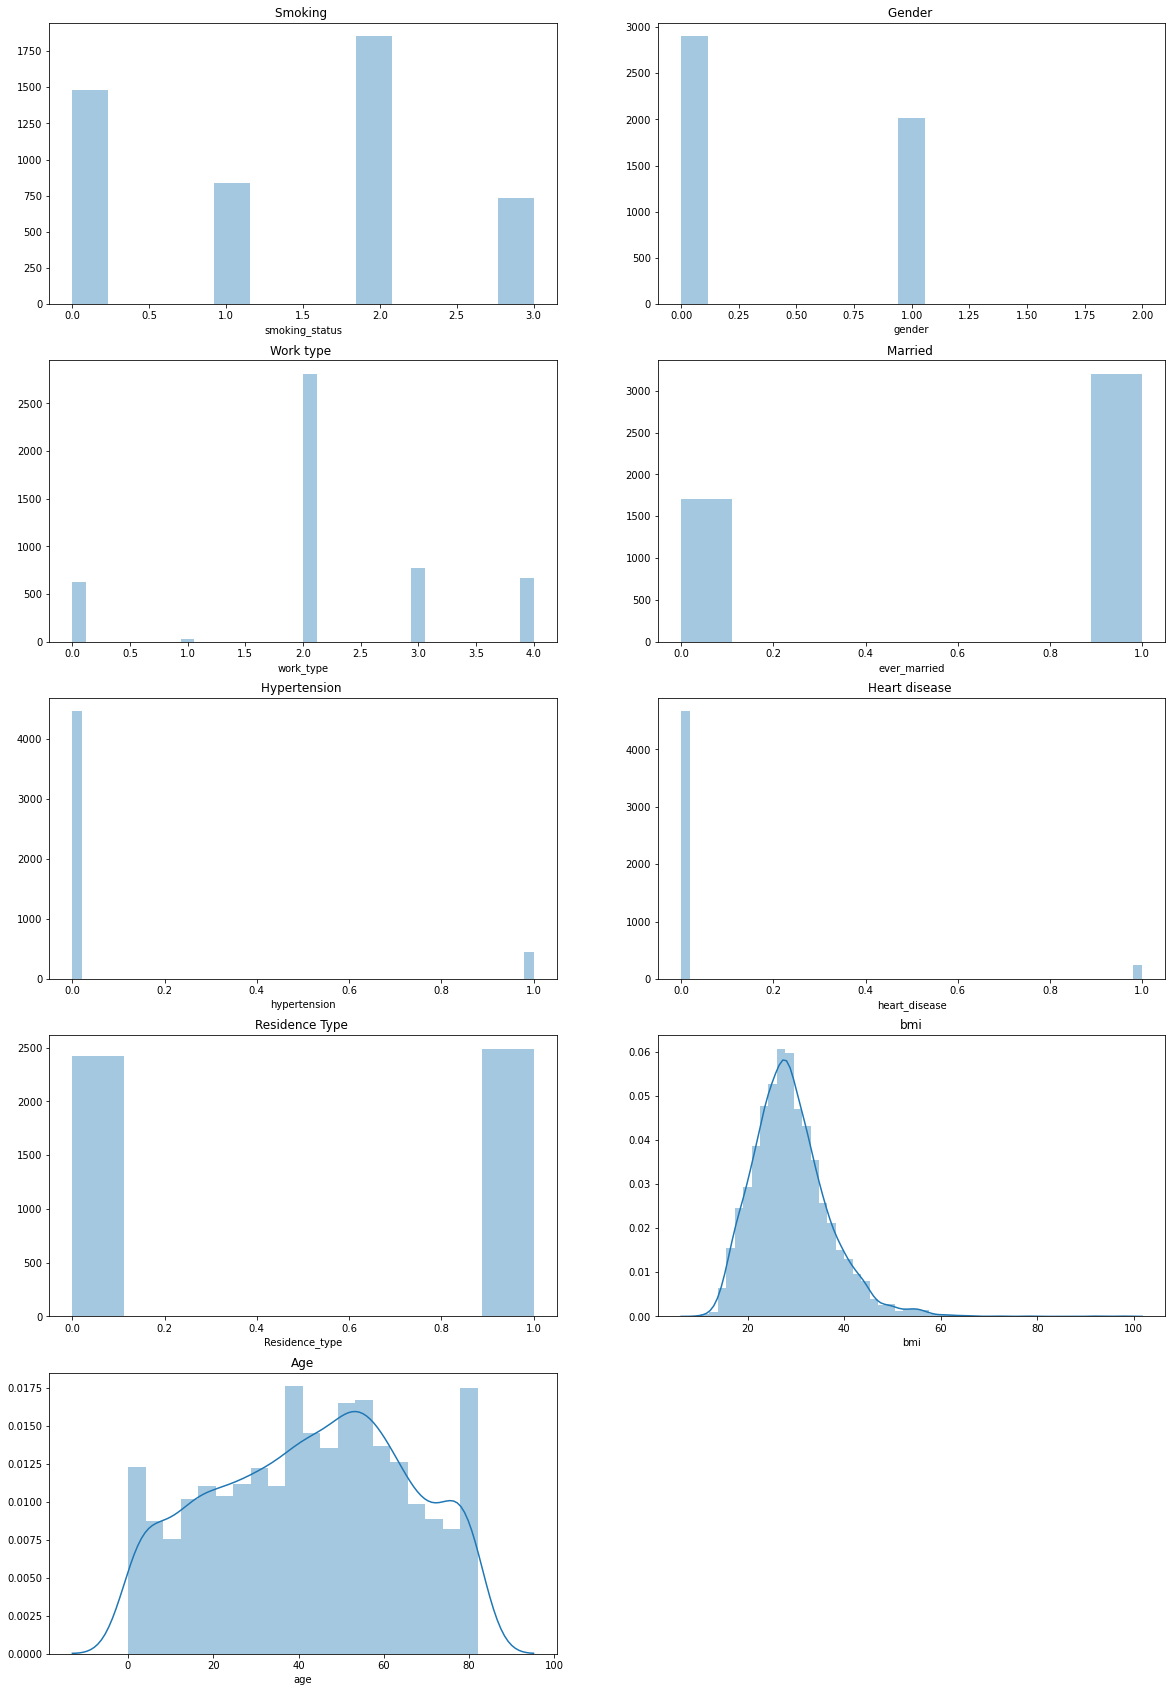

In [35]:
plt.figure(figsize=(20,30))
plt.subplot(5,2,1)
sns.distplot(df.smoking_status, kde=False)
plt.title('Smoking ')

plt.subplot(5,2,2)
sns.distplot(df.gender, kde=False)
plt.title('Gender ')

plt.subplot(5,2,3)
sns.distplot(df.work_type, kde=False)
plt.title('Work type ')

plt.subplot(5,2,4)
sns.distplot(df.ever_married, kde=False)
plt.title('Married ')

plt.subplot(5,2,5)
sns.distplot(df.hypertension, kde=False)
plt.title('Hypertension ')

plt.subplot(5,2,6)
sns.distplot(df.heart_disease, kde=False)
plt.title('Heart disease ')

plt.subplot(5,2,7)
sns.distplot(df.Residence_type, kde=False)
plt.title('Residence Type ')

plt.subplot(5,2,8)
sns.distplot(df.bmi)
plt.title('bmi')

plt.subplot(5,2,9)
sns.distplot(df.age)
plt.title('Age')
